In [34]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [35]:
import matplotlib.pyplot as plt

In [76]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[:30000,:,:], x_test[:30000,:,:]
y_train, y_test = y_train[:30000], y_test[:30000]

In [89]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0


In [52]:
x_train.shape

(30000, 28, 28)

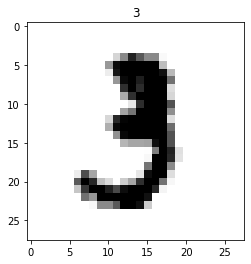

In [53]:
plt.title(y_train[10])
plt.imshow(x_train[10], cmap=plt.get_cmap('gray_r'))
plt.show()

In [39]:
def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

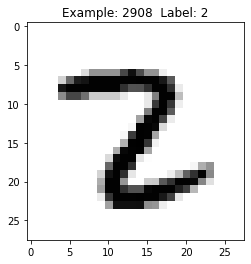

In [40]:
display_digit(2908)

In [90]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [91]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [92]:
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2637 - accuracy: 0.9263
Epoch 2/3
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1174 - accuracy: 0.9656
Epoch 3/3
60000/60000 [==============================] - 10s 175us/sample - loss: 0.0828 - accuracy: 0.9750


In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

Наконец можно сделать предсказание для массива входжнх изображений. Выберем изображение 0 и его значение. Получим вектор предсказания. Видно, что предсказание идеально совпадает для нулевого элемента.

In [ ]:
predictions = model.predict(x_test[0:1,:,:])
print(predictions)
print(y_test[0])

In [65]:
(x2_train, y2_train),(x2_test, y2_test) = mnist.load_data()
x2_train, x2_test = x2_train[30000:,:,:]/255.0, x2_test[30000:,:,:]/255.0
y2_train, y2_test = y2_train[:30000], y_test[:30000]

In [93]:
(x2_train, y2_train),(x2_test, y2_test) = mnist.load_data()
x2_train, x2_test = x_train, x_test

In [94]:
loss, acc = model.evaluate(x2_train, y2_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

60000/60000 [==============================] - 6s 94us/sample - loss: 0.0591 - accuracy: 0.9825
Loss = 0.059093472377924866, accuracy = 0.982450008392334
